# Multiple Linear Regression

In [9]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("C:\\Users\\pc\\Desktop\\Data Science\\MachineLearning\\Advertising.csv", index_col=0)

In [11]:
df.head(4)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5


In [13]:
# Check Shape of DataSet
df.shape

(200, 4)

In [15]:
# Check Data and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# Checking Linear Relationship

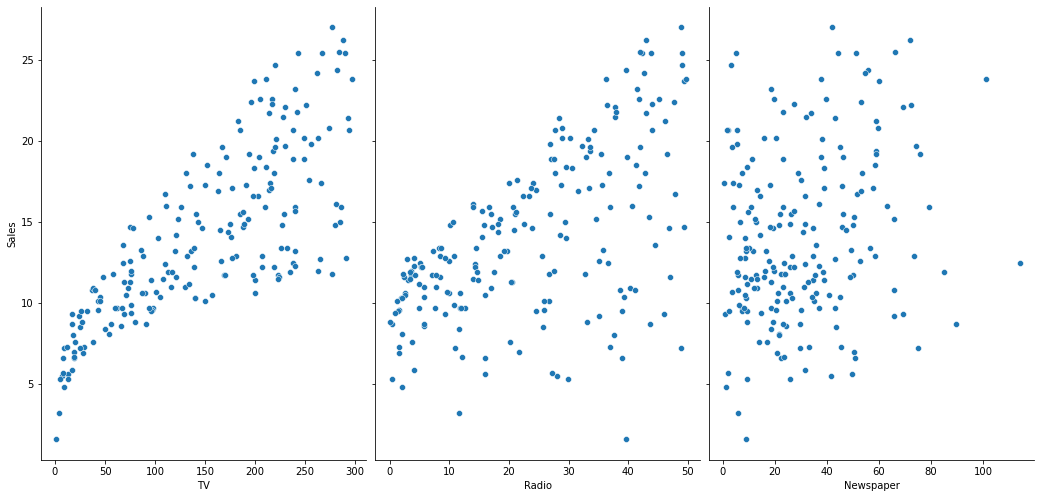

In [20]:
# Visualize the relationship between the features and the response using Scatterplots
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)  # aspect controls the size graphs

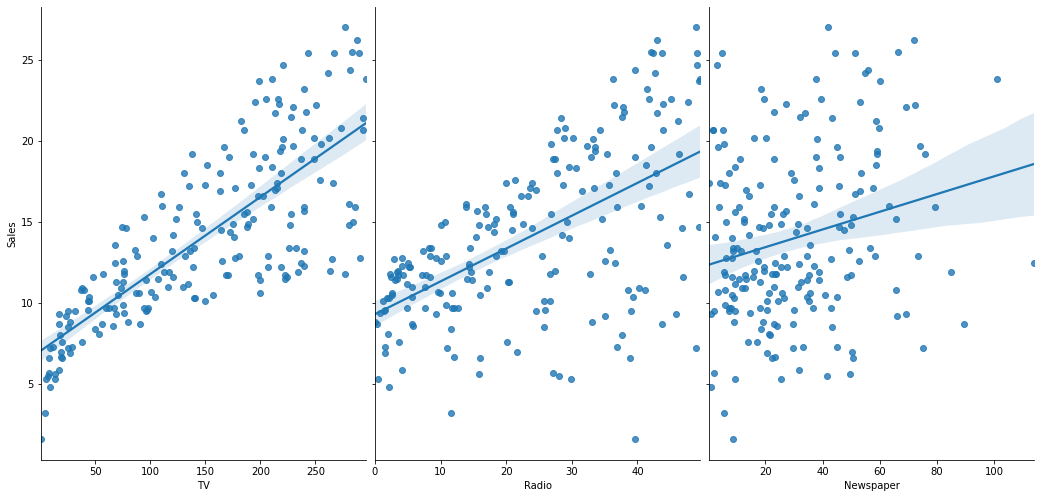

In [21]:
# plotting scatterplots with the line of best fit 
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

Conclusion.


Strong relationship between TV ads and sales
Weak relationship between Radion ads and sales
Very weak relationship between Newspaper ads and sales.

# Preparing X & y using Pandas



In [22]:
# Creating Independent variable X & Dependent variable y

features_colms =  ['TV','Radio','Newspaper']
X=df[features_colms]
y=df['Sales']

## Splitting X & y into Training and Testing sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [24]:
# Default split is .75 for training and .25 for testing

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Fitting MLR model on training Dataset

In [31]:
# Import Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Instantiate
lr = LinearRegression()

#fit the model to the Training data (Learn the coefficients)

lr.fit(X_train, y_train)

LinearRegression()

In [32]:
print("Intercept",lr.intercept_,'\n',"Coefficient",lr.coef_)

Intercept 2.89257005115115 
 Coefficient [0.04416235 0.19900368 0.00116268]


In [33]:
# Pair the feature names with Coefficients

for i,j in zip(features_colms, lr.coef_):
    print(i,':',round(j,3))

TV : 0.044
Radio : 0.199
Newspaper : 0.001


How do we interpret these coefficients?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.04416 "unit" increase in Sales. Or more clearly, for a given amount of Radio and Newspaper ad spending, an increase of $1,000 spent on TV ads will lead to an increase in sales by around 44.16 uints (0.04416 * 1000).

Similary, for a given amount of TV & Newspaper ad spending, then an increase of $1000 in Radio ad spending will lead to an increase in sales by around 199 units (0.199 * 1000).

However, for the newspaper budget, since the coefficient is quite negligible (close to zero), it’s evident that the newspaper is not affecting the sales.

## Make Predictions on test dataset

In [34]:
# Make Predictions on the testing set

y_pred = lr.predict(X_test)

In [35]:
#Mean Absolute Error(MAE)
print("Mean Absolute Error",metrics.mean_absolute_error(y_test, y_pred))

#Mean Square Error (MSE)
print("Mean Square Error",metrics.mean_squared_error(y_test, y_pred))

#Root Mean Square Error(RMSE)
print("Root Mean Square Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 1.300032091923545
Mean Square Error 4.0124975229171
Root Mean Square Error 2.003121944095541


### Coefficient of Determination

Coefficient of Determination also called R-Square or OPTIMIZATION.



    Process of finding best model outof various model is called optimization.

In [36]:
print("R-Square",metrics.r2_score(y_test,y_pred))

R-Square 0.8576396745320893


R-squared value of predictions: 0.8576396745320893


This model has a higher R-squared (0.857) than the SLR model we previously used, which means that this model provides a better fit to the data than a model that only one variable.

In [42]:
#cross-checking

df_check = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.ravel()})
df_check

,Actual,Predicted
0,11.3,10.049457
1,8.4,7.430523
2,8.7,6.971521
3,25.4,24.163787
4,11.7,12.002156
5,8.7,6.543346
6,7.2,13.095263
7,13.2,14.958792
8,9.2,11.005284
9,16.6,16.272346


Feature Selection


How do I decide which features to include in a linear model? which one or which two are important? Are all of them important?

To find this out, we will perform Feature Selection or variable selection. Now one way of doing this is trying all possible combinations of independent variables. Another idea is strategically create a model by checking whether the R-squared as you add new features.

This idea is called Forward Selection and the steps to follow are:

1) We start with a model without any predictor and just the intercept term.

2) We then perform simple linear regression for each predictor to find the best performer (greatest 
R
2
).

3) We then add another variable to it and check for the best 2-variable combination again by checking greatest 
R
2
.

4) After that the best 3-variable combination is checked, and so on. The approach is stopped when some stopping rule is satisfied.

In [44]:
#For TV

# create a Python list of feature names
feature_cols = ['TV']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]
# select target variable from the DataFrame
y = df['Sales']

# splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate
model_TV = LinearRegression()

# fit the model to the training data (learn the coefficients)
model_TV.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_TV.predict(X_test)

#R2
R2_TV = round(metrics.r2_score(y_test,y_pred),2)
print("R-squared value:",R2_TV)

R-squared value: 0.69


In [45]:
#For Radio

# create a Python list of feature names
feature_cols = ['Radio']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select target variable from the DataFrame
y = df['Sales']

# splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate
model_Radio = LinearRegression()

# fit the model to the training data (learn the coefficients)
model_Radio.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_Radio.predict(X_test)

#R2
R2_Radio = round(metrics.r2_score(y_test,y_pred),2)
print("R-squared value:",R2_Radio)

R-squared value: 0.15


In [46]:
#For Newspaper

# create a Python list of feature names
feature_cols = ['Newspaper']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select target variable from the DataFrame
y = df['Sales']

# splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate
model_NP = LinearRegression()

# fit the model to the training data (learn the coefficients)
model_NP.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_NP.predict(X_test)

#R2
R2_NP = round(metrics.r2_score(y_test,y_pred),2)
print("R-squared value:",R2_NP)

R-squared value: -0.1


We observe that for model_TV, R² value is the most among all the models. Hence we select model_TV as our base model to move forward.

Now, we will add the radio and newspaper one by one and check the new values.



In [47]:
#For TV, Radio

# create a Python list of feature names
feature_cols = ['TV','Radio']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select target variable from the DataFrame
y = df['Sales']

# splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate
model_TV_Radio = LinearRegression()

# fit the model to the training data (learn the coefficients)
model_TV_Radio.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_TV_Radio.predict(X_test)

# R2
R2_TV_Radio = round(metrics.r2_score(y_test,y_pred),2)
print("R-squared value:",R2_TV_Radio)

R-squared value: 0.86


In [48]:
#For TV, Newspaper

# create a Python list of feature names
feature_cols = ['TV','Newspaper']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select target variable from the DataFrame
y = df['Sales']

# splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate
model_TV_NP = LinearRegression()

# fit the model to the training data (learn the coefficients)
model_TV_NP.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_TV_NP.predict(X_test)

#R2
R2_TV_NP = round(metrics.r2_score(y_test,y_pred),2)
print("R-squared value:",R2_TV_NP)


R-squared value: 0.73


In [49]:
#For TV, Radio, Newspaper

# create a Python list of feature names
feature_cols = ['TV','Radio','Newspaper']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select target variable from the DataFrame
y = df['Sales']

# splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate
model_TV_Radio_NP = LinearRegression()

# fit the model to the training data (learn the coefficients)
model_TV_Radio_NP.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_TV_Radio_NP.predict(X_test)

#R2
R2_TV_Radio_NP = round(metrics.r2_score(y_test,y_pred),2)
print("R-squared value:",R2_TV_Radio_NP)

R-squared value: 0.86


Adjusted - R-Square


R-squared will generally always increase as you add more features to the model, even if they are unrelated to the response (target variable). Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

In [51]:
# Adjusted R2 for Sales ~ TV + Radio

print("R-squared value:", R2_TV_Radio)

n = 50
p = 2

Adj_R2_TV_Radio = 1 - ((1 - R2_TV_Radio)*(n-1)/(n-p-1))
print("Adjusted R-squared value TV + Radio:",round(Adj_R2_TV_Radio,4))

# Adjusted R2 Sales ~ TV + Newspaper

print("R-squared value:", R2_TV_NP)

n = 50
p = 2

Adj_R2_TV_NP = 1 - ((1 - R2_TV_NP)*(n-1)/(n-p-1))
print("Adjusted R-squared value: TV + Newspaper",round(Adj_R2_TV_NP,4))

# Adjusted R2 Sales ~ TV + Radio + Newspaper

print("R-squared value: TV + Radio + Newspaper", R2_TV_Radio_NP)

n = 50  # number of observations
p = 3   # number of independent varibales

Adj_R2_TV_Radio_NP = 1 - ((1 - R2_TV_Radio_NP)*(n-1)/(n-p-1))
print("Adjusted R-squared value:",round(Adj_R2_TV_Radio_NP,4))

R-squared value: 0.86
Adjusted R-squared value TV + Radio: 0.854
R-squared value: 0.73
Adjusted R-squared value: TV + Newspaper 0.7185
R-squared value: TV + Radio + Newspaper 0.86
Adjusted R-squared value: 0.8509


# Handling Categorical Features with More than Two Categories

In [54]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
df['Area'] = 'rural'
df.loc[mask_suburban, 'Area'] = 'suburban'
df.loc[mask_urban, 'Area'] = 'urban'
df.head()

,TV,Radio,Newspaper,Sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban


We have to represent Area numerically, but we can't simply code it as 0 = rural, 1 = suburban, 2 = urban because that would imply an ordered relationship between suburban and urban, and thus urban is somehow "twice" the suburban category. Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

Anyway, our Area feature is unordered, so we have to create additional dummy variables.

One Hot Encoding
One hot encoding enables us to create new attributes according to the number of classes present in the categorical attribute i.e if there are 
n
 number of categories in categorical attribute, 
n
 new attributes will be created. These attributes created are called Dummy Variables. Hence, dummy variables are “proxy” variables for categorical data in regression models.

In [56]:
from sklearn.preprocessing import OneHotEncoder

area_ohe = OneHotEncoder()   #create an instance of OHE
area_feature_arr = area_ohe.fit_transform(df[['Area']]).toarray()

#coverting OHE array to dataframe
area_features_df = pd.DataFrame(area_feature_arr,columns = area_ohe.get_feature_names())

In [58]:
area_features_df

,x0_rural,x0_suburban,x0_urban
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
195,0.0,1.0,0.0
196,0.0,0.0,1.0
197,0.0,1.0,0.0
198,1.0,0.0,0.0


In [59]:
# Resetting Indices befor concationation

df.reset_index(inplace=True, drop=True)
df

,TV,Radio,Newspaper,Sales,Area
0,230.1,37.8,69.2,22.1,rural
1,44.5,39.3,45.1,10.4,urban
2,17.2,45.9,69.3,9.3,rural
3,151.5,41.3,58.5,18.5,urban
4,180.8,10.8,58.4,12.9,suburban
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,suburban
196,94.2,4.9,8.1,9.7,urban
197,177.0,9.3,6.4,12.8,suburban
198,283.6,42.0,66.2,25.5,rural


In [60]:
df.drop(columns=['Area']) # Dropping Area as it now one hot encoded

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [69]:
df_new = pd.concat([df, area_features_df], axis=1)

In [70]:
df_new.head()

,TV,Radio,Newspaper,Sales,Area,x0_rural,x0_suburban,x0_urban
0,230.1,37.8,69.2,22.1,rural,1.0,0.0,0.0
1,44.5,39.3,45.1,10.4,urban,0.0,0.0,1.0
2,17.2,45.9,69.3,9.3,rural,1.0,0.0,0.0
3,151.5,41.3,58.5,18.5,urban,0.0,0.0,1.0
4,180.8,10.8,58.4,12.9,suburban,0.0,1.0,0.0


Dummy Variable Trap



The Dummy variable trap is a scenario where there are attributes which are highly correlated (Multicollinear) and one variable predicts the value of others. When we use one hot encoding for handling the categorical data, then one dummy variable (attribute) can be predicted with the help of other dummy variables. Hence, one dummy variable is highly correlated with other dummy variables. Using all dummy variables for regression models lead to dummy variable trap. So, the regression models should be designed excluding one dummy variable.

Though we are getting rid of categorical variables by using dummy variables, we are introducing multicollinearity in the data. This is the TRAP!!!!!!!-----

The TRAP:

Do you see a problem with above training data? If no, please have a look at below equation:

Area_rural + Area_suburban + Area_urban = 1

Above equation hold true for all the data points in the training data. If we break the problem further,

Area_rural can be predicted by Area_suburban and Area_urban
Area_suburban can be predicted by Area_rural and Area_urban
Area_urban can be predicted by Area_rural and Area_suburban
If 2 values are known, third one can be predicted!!!!!

This is a clear case of perfect multicollinearity.

Recall that, multicollinearity is a phenomenon in which one independent variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

Escape from the TRAP:

To avoid the TRAP, the solution is to declare one variable less that number of levels in the categorical variable

Dummy variables count = Category count — 1

In our case, category count = 3 (i.e, rural,suburban, urban)

Hence, to avoid TRAP, we should have 3–1 = 2 dummy variables created.

The obvious question is how to decide which variable to drop? The answer is any.

In [71]:
df_new.drop(columns = ['x0_rural'], axis=1 ,inplace=True)
df_new.head()

,TV,Radio,Newspaper,Sales,Area,x0_suburban,x0_urban
0,230.1,37.8,69.2,22.1,rural,0.0,0.0
1,44.5,39.3,45.1,10.4,urban,0.0,1.0
2,17.2,45.9,69.3,9.3,rural,0.0,0.0
3,151.5,41.3,58.5,18.5,urban,0.0,1.0
4,180.8,10.8,58.4,12.9,suburban,1.0,0.0


In [75]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper','x0_suburban','x0_urban']
X = df_new[feature_cols]
y = df_new.Sales

# instantiate, fit
lm3 = LinearRegression()
lm3.fit(X, y)

# pair the feature names with the coefficients

for i,j in zip(feature_cols, lm3.coef_):
    print (i,':',round(j,3))

TV : 0.046
Radio : 0.188
Newspaper : -0.001
x0_suburban : -0.118
x0_urban : 0.254


However, how will you interpret a categorical independent variable? It may not be right to interpret it as when one unit change in rural !!

The correct approach in this case is to interpret the coefficient with respect to the baseline dummy or the dummy that we did not add in the model.

Going back to the example, we dropped rural from the model. Hence, it acts a baseline dummy and does not provide any incremental information to the model.

A positive urban coefficient means that as compared to rural, sales is more associated with urban. A negative suburban coefficient will indicate that sales is less associated to suburban as compared to rural.

